In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import openpyxl
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

In [2]:
dfbs = pd.read_excel(r"C:\Users\eywy0\Downloads\raw-census-tracts-dataset_clean.xlsx")
dfbs.head()

,Unnamed: 0,Unnamed: 0.1,POPULATION,POPULATION_DENSITY,RURAL_POPULATION_PERCENTAGE,RURAL_POPULATION_DENSITY,MALE_FEMALE_RATIO,WHITE_ALONE,BLACK_ALONE,AMERICAN_INDIAN_ALASKA_NATIVE_ALONE,...,MEDIAN_INCOME,POVERTY_RATE,DEMOCRAT_PERCENTAGE,REPUBLICAN_PERCENTAGE,OBESITY_RATE,SMOKING_RATE,DRUG_OVERDOSE_DEATH_RATE,PRECIPITATION,TOTAL_ACCIDENTS,DRUNK_DRIVING_PERCENTAGE
0,0,0,0.001629,188.536533,0.032291,7.990649,104.895000,60.739427,14.807821,2.460794,...,32463.914002,1.701977,54.887154,28.972410,39.727870,14.673271,99.900000,38.537022,13.603062,9.027207
1,1,1,0.004568,0.100000,0.011869,56.230687,97.858856,98.436834,0.010000,1.580469,...,47608.501369,3.581751,32.796780,33.609767,46.973692,14.229877,6.965160,88.651651,50.464376,26.229567
2,2,2,0.800408,999.000000,0.020898,36.496362,104.895000,74.624715,0.010000,0.010000,...,56322.183175,2.651653,37.715517,37.275346,43.374924,9.100637,31.960733,43.010389,12.010000,15.838133
3,3,3,2.822161,510.634838,17.065325,99.957909,101.611398,64.416833,3.554620,0.010000,...,28074.760879,2.577355,34.461998,39.989110,38.251403,11.956131,99.900000,50.250622,29.090148,11.268868
4,4,4,5.042789,0.100000,0.034675,5.877269,99.690018,80.366648,6.901976,1.685286,...,41707.121227,2.275618,45.124522,30.088506,38.331628,9.132512,5.975314,97.429530,18.845805,29.343376


In [3]:
dfs = pd.read_excel(r"C:\Users\eywy0\Downloads\raw_state_data_drunk_driving.xlsx")
dfs.head()

,STATE,STATE_NAME,POPULATION,POPULATION_DENSITY,RURAL_POPULATION_PERCENTAGE,RURAL_POPULATION_DENSITY,MALE_FEMALE_RATIO,WHITE_ALONE,BLACK_ALONE,AMERICAN_INDIAN_ALASKA_NATIVE_ALONE,...,MEDIAN_INCOME,POVERTY_RATE,DEMOCRAT_PERCENTAGE,REPUBLICAN_PERCENTAGE,OBESITY_RATE,SMOKING_RATE,DRUG_OVERDOSE_DEATH_RATE,PRECIPITATION,TOTAL_ACCIDENTS,DRUNK_DRIVING_PERCENTAGE_2
0,1,Alabama,5.07,99.52,41.0,40.4,93.6,69.1,26.8,0.7,...,48608,14.5,35,52,39.9,15.0,22.3,56.00,852,22.231
1,2,Alaska,0.73,1.28,34.0,0.4,109.2,65.3,3.7,15.6,...,67138,11.7,33,51,33.5,15.0,22.0,29.03,53,28.480
2,4,Arizona,7.36,64.05,10.2,5.8,98.8,82.6,5.2,5.3,...,54301,11.2,41,41,31.3,12.0,35.8,11.80,967,18.330
3,5,Arkansas,3.01,58.16,43.8,25.1,96.4,79.0,15.7,1.0,...,51148,15.1,35,48,38.7,18.0,19.1,49.72,585,26.710
4,6,California,39.03,251.90,5.1,12.7,98.9,71.9,6.5,1.6,...,76386,11.0,51,31,27.6,9.0,21.8,22.97,3558,25.424


In [4]:
# linear model


X=dfbs.drop(['Unnamed: 0','Unnamed: 0.1','DRUNK_DRIVING_PERCENTAGE'],axis=1)
y=dfbs['DRUNK_DRIVING_PERCENTAGE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
reg=LinearRegression().fit(X_train, y_train)
pred=reg.predict(X_test)
mse(pred,y_test)
# bins = np.linspace(0, 60, 120)
# plt.hist(pred, bins, alpha=0.5, label='predicted values')
# plt.hist(y_test, bins, alpha=0.5, label='true values')
# plt.legend(loc='upper right')
# plt.xlabel('DRUNK_DRIVING_PERCENTAGE')
# plt.ylabel('# of states')
# plt.show()

51.83397857435104

In [ ]:
bins = np.linspace((pred-y_test).min(), (pred-y_test).max(), 120)
plt.hist(pred-y_test, bins, alpha=0.5, label='error')
plt.legend(loc='upper right')
plt.xlabel('predition error')
plt.ylabel('# of states')
plt.show()

In [ ]:
regl = Lasso(alpha=.1).fit(X_train, y_train)
regr = Ridge(alpha=.1).fit(X_train, y_train)
predl,predr=regl.predict(X_test),regr.predict(X_test)

bins = np.linspace(0, max(y_test.max(),predl.max()), 140)
plt.hist(predr, bins, alpha=0.55, label='predicted values (L1)')
plt.hist(predl, bins, alpha=0.55,label='predicted values (L2)')
plt.hist(y_test, bins, alpha=0.55, label='true values')
plt.legend(loc='upper right')
plt.xlabel('DRUNK_DRIVING_PERCENTAGE')
plt.ylabel('# of states')
plt.show()


In [ ]:
bins = np.linspace((predr-y_test).min(), (predr-y_test).max(), 120)
plt.hist(predr-y_test, bins, alpha=0.5, label='error (L1)')
plt.hist(predl-y_test, bins, alpha=0.5, label='error (L2)')
plt.legend(loc='upper right')
plt.xlabel('error')
plt.ylabel('# of states')
plt.show()

In [ ]:
def las(j):
    return Lasso(alpha=j/50).fit(X_train, y_train).predict(X_test) 
def rid(j):
    return Ridge(alpha=j/10).fit(X_train, y_train).predict(X_test) 
plt.plot([i/50 for i in range(1,50)],[mse(y_test,las(i)) for i inrange(1,50)])
plt.plot([i/50 for i in range(1,50)],[mse(y_test,rid(i)) for i in range(1,50)])

In [ ]:
plt.plot([i/10 for i in range(1,10)],[mse(y_test,rid(i)) for i in range(1,10)])

In [ ]:
# random forest

for i in range(1,70,10):
    rf = RandomForestRegressor(n_estimators = i, random_state = 42)
    rf.fit(X_train, y_train)
    predf=rf.predict(X_test)
    print(mse(y_test,predf))

In [ ]:
bins = np.linspace(y_test.min(), y_test.max(), 120)
plt.hist(predf, bins, alpha=0.5, label='predicted values')
plt.hist(y_test, bins, alpha=0.5, label='true values')
plt.legend(loc='upper right')
plt.xlabel('error')
plt.ylabel('# of states')
plt.show()

In [ ]:
# run longer than ean eternity

param_grid = {
    'max_depth': [5,10,15,20,25],
    'max_leaf_nodes': [2,4,6],}
grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_estimator_)

In [ ]:
rf = RandomForestRegressor(n_estimators = 50, max_depth=20, max_features=None, max_leaf_nodes=5, random_state = 42)
rf.fit(X_train, y_train)
predf=rf.predict(X_test)
print(mse(y_test,predf))

74.31698879527771


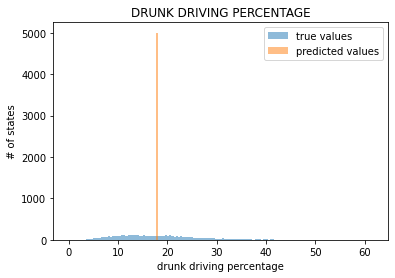

In [8]:
# neural network 

# Device configuration 
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 100
learning_rate = 0.005
hidden_size = 500

nX=(X-X.mean())/X.std()
X_train, X_test, y_train, y_test = train_test_split(nX, y, test_size=0.25, random_state=42)

class NeuralNet(nn.Module): 
    def __init__(self, hidden_size, activation):
        super(NeuralNet, self).__init__() 
        self.l1 = nn.Linear(22, hidden_size) 
        self.l2 = nn.Linear(hidden_size, hidden_size) 
        self.l3 = nn.Linear(hidden_size, hidden_size)
        self.l4 = nn.Linear(hidden_size, hidden_size) 
        self.l5 = nn.Linear(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, 1) 
        if activation == 'softmax': 
            self.act = nn.Softmax()
        elif activation == 'relu': 
            self.act = nn.ReLU()
        elif activation == 'mish': 
            self.act = nn.Mish()
        elif activation == 'tanh': 
            self.act = nn.Tanh()
    
    def forward(self, x):
        out = self.l1(x)
        out = self.act(out)
        out = self.l2(out)
        out = self.act(out)
        out = self.l3(out)
        out = self.act(out)
        out = self.l4(out)
        out = self.act(out)
        out = self.l5(out)
        out = self.act(out)
        out = self.out(out)
        return out

Xtrain = torch.tensor(X_train.values,dtype=torch.float32)
ytrain = torch.tensor(y_train.values,dtype=torch.float32)
Xtest = torch.tensor(X_test.values,dtype=torch.float32)
ytest = torch.tensor(y_test.values,dtype=torch.float32)

# bblst={}
# for ttime in range(3):

model = NeuralNet(hidden_size,'relu')
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.4)

for epoch in range(num_epochs):
    for i in range(0, len(Xtrain), batch_size):
        Xbatch = Xtrain[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = ytrain[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

with torch.no_grad():
    yprednn = model(Xtest)
    # bblst[ttime]=pd.DataFrame(yprednn.tolist()).iloc[:,0]
    # bb=pd.DataFrame(yprednn.tolist()).iloc[:,0]
    
aa=y_test.reset_index().drop('index',axis=1).iloc[:,0]  
bb=pd.DataFrame(yprednn.tolist()).iloc[:,0]

print(mse(aa,bb))

bins = np.linspace(0, aa.max(), 140)
plt.hist(aa, bins, alpha=0.5, label='true values')
plt.hist(bb, bins, alpha=0.5, label='predicted values')
plt.legend(loc='upper right')
plt.xlabel('drunk driving percentage')
plt.ylabel('# of states')
plt.title('DRUNK DRIVING PERCENTAGE')
plt.show()

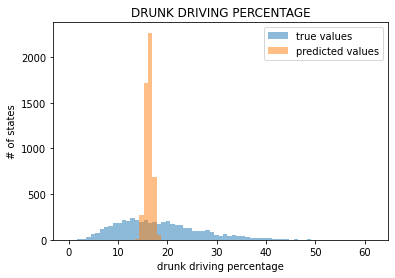

In [6]:
# first train model

bins = np.linspace(0, aa.max(), 70)
# for t,value in bblst.items():
#     plt.hist(value, bins, alpha=0.5, label='predicted values '+str(t))
plt.hist(aa, bins, alpha=0.5, label='true values')
plt.hist(bb, bins, alpha=0.5, label='predicted values')
plt.legend(loc='upper right')
plt.xlabel('drunk driving percentage')
plt.ylabel('# of states')
plt.title('DRUNK DRIVING PERCENTAGE')
plt.show()

# 19.077768
# 19.077885
# 19.077583

In [48]:
# parameters tunning

param_grid = {
    'epochs' : [5],
    'optimizer' : ['SGD', 'Adam'],
    'momentum' : [0.0, 0.4],
    'activation' : ['softmax', 'relu'],
    'hidden_size' : [500, 1000]}
grid_search = GridSearchCV(NeuralNet(500,),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)


def create_model(optimizer,init='glorot_uniform',activation):
    model = Sequential()
    model.add(Dense(12, input_dim=22, kernel_initializer=init, activation=activation))
    model.add(Dense(22, kernel_initializer=init, activation=activation))
    model.add(Dense(1, kernel_initializer=init, activation=activation))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
 
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(model=create_model, verbose=0)
print(model.get_params().keys())
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, model__init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)

TypeError: __init__() missing 2 required positional arguments: 'hidden_size' and 'activation'

In [136]:
# transfer learning 

# X=dfbs.drop(['Unnamed: 0','Unnamed: 0.1','DRUNK_DRIVING_PERCENTAGE'],axis=1)
# y=dfbs['DRUNK_DRIVING_PERCENTAGE']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

rX=dfs.drop(['STATE','STATE_NAME','DRUNK_DRIVING_PERCENTAGE_2'],axis=1)
ry=dfs['DRUNK_DRIVING_PERCENTAGE_2']
rX_train, rX_test, ry_train, ry_test = train_test_split(rX, ry, test_size=0.33, random_state=0)

rreg=LinearRegression().fit(rX_train, ry_train)
rpredl=reg.predict(X_test)
print(mse(y_test,predl))

rrf = RandomForestRegressor(n_estimators = 50, random_state = 42).fit(rX_train, ry_train)
rpredf=rf.predict(X_test)
print(mse(y_test,predf))

rXpred=reg.predict(rX_test)
print(mse(ry_test,rXpred)) # row 4 highest error (264% lol)
rXpredf=rf.predict(rX_test)
print(mse(ry_test,rXpredf))

# Let's try to achieve some transfer via training. First, train a neural network on census-tracts-dataset.csv. 
# Then, once this first training is done, fine-tune the network by training on the data from raw_state_data_drunk_driving.csv. 
# Note, you might want to only train on raw_state_data_drunk_driving.csv for a few iterations, since it is small and you risk 
# overfitting if you train for a long time. How do your results compare to the results from 11? Does transfer help at all?

52.07439220643717
48.88811870299077
4501.0512911090555
155.02166535130743


In [245]:
model = NeuralNet(hidden_size,'relu')
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.4)

rXtrain = torch.tensor(rX_train.values,dtype=torch.float32)
rytrain = torch.tensor(ry_train.values,dtype=torch.float32)
rXtest = torch.tensor(rX_test.values,dtype=torch.float32)
rytest = torch.tensor(ry_test.values,dtype=torch.float32)

for epoch in range(5):
    for i in range(0, len(rXtrain), batch_size):
        Xbatch = Xtrain[i:i+11]
        y_pred = model(Xbatch)
        ybatch = ytrain[i:i+11]
        loss = loss_fn(y_pred, ybatch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

with torch.no_grad():
    yprednn = model(Xtest)
    mse(yprednn,ry_test)
    # bblst[ttime]=pd.DataFrame(yprednn.tolist()).iloc[:,0]
    # bb=pd.DataFrame(yprednn.tolist()).iloc[:,0]
    

ValueError: Found input variables with inconsistent numbers of samples: [6600, 17]

In [202]:
model = NeuralNet(hidden_size,'softmax')
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.4)
batch_size=50

for epoch in range(num_epochs):
    for i in range(0, len(Xtrain), batch_size):
        Xbatch = Xtrain[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = ytrain[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
rXtrain = torch.tensor(rX_train.values,dtype=torch.float32)
rytrain = torch.tensor(ry_train.values,dtype=torch.float32)
rXtest = torch.tensor(rX_test.values,dtype=torch.float32)
rytest = torch.tensor(ry_test.values,dtype=torch.float32)
        
rXt = torch.tensor(rX.values,dtype=torch.float32)  
ryt = torch.tensor(ry.values,dtype=torch.float32) 
    
for epoch in range(2):
    for i in range(0, len(rX), batch_size):
        Xbatch = rXt[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = ryt[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

with torch.no_grad():
    yprednn = model(rXt)
    # bblst[ttime]=pd.DataFrame(yprednn.tolist()).iloc[:,0]
    # bb=pd.DataFrame(yprednn.tolist()).iloc[:,0]
    
aa=ry.reset_index().drop('index',axis=1).iloc[:,0]  
bb=pd.DataFrame(yprednn.tolist()).iloc[:,0]

mse(aa,bb)
# bins = np.linspace(0, aa.max(), 140)
# plt.hist(aa, bins, alpha=0.5, label='true values')
# plt.hist(bb, bins, alpha=0.5, label='predicted values')
# plt.legend(loc='upper right')
# plt.xlabel('drunk driving percentage')
# plt.ylabel('# of states')
# plt.title('DRUNK DRIVING PERCENTAGE')
# plt.show()

142.4798800943919

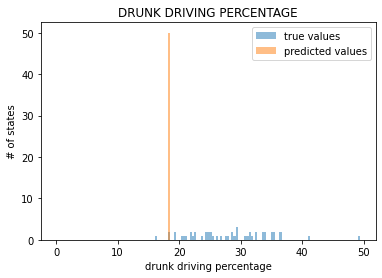

142.4798800943919


In [247]:
bins = np.linspace(0, aa.max(), 140)
plt.hist(aa, bins, alpha=0.5, label='true values')
plt.hist(bb, bins, alpha=0.5, label='predicted values')
plt.legend(loc='upper right')
plt.xlabel('drunk driving percentage')
plt.ylabel('# of states')
plt.title('DRUNK DRIVING PERCENTAGE')
plt.show()
print(mse(aa,bb))

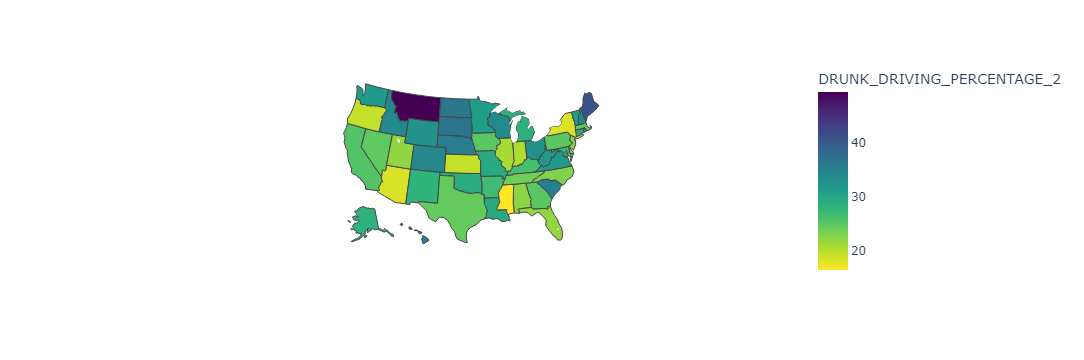

In [185]:
import plotly.express as px
state= {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
dfs['code']=[state[name] for name in dfs['STATE_NAME']]
fig = px.choropleth(dfs,
                    locations='code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='DRUNK_DRIVING_PERCENTAGE_2',
                    color_continuous_scale="Viridis_r", 
                    )
fig.show()

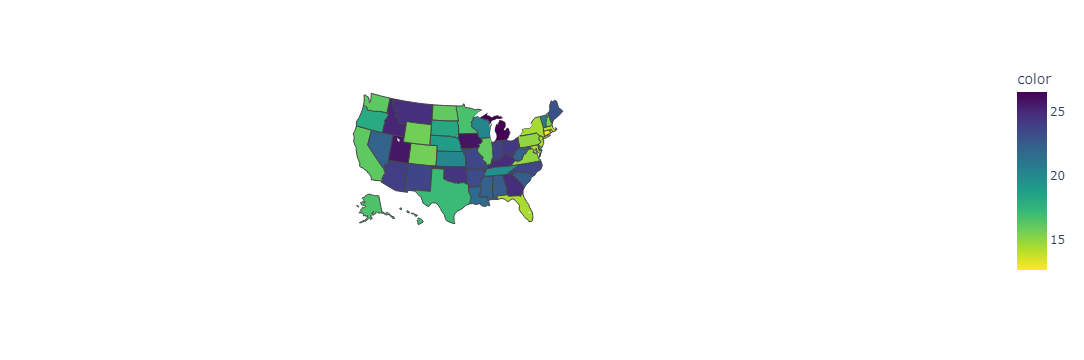

In [206]:
import plotly.express as px
dfs['code']=[state[name] for name in dfs['STATE_NAME']]
fig = px.choropleth(dfs,
                    locations='code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color=rf.predict(rX),
                    color_continuous_scale="Viridis_r", 
                    )
fig.show()

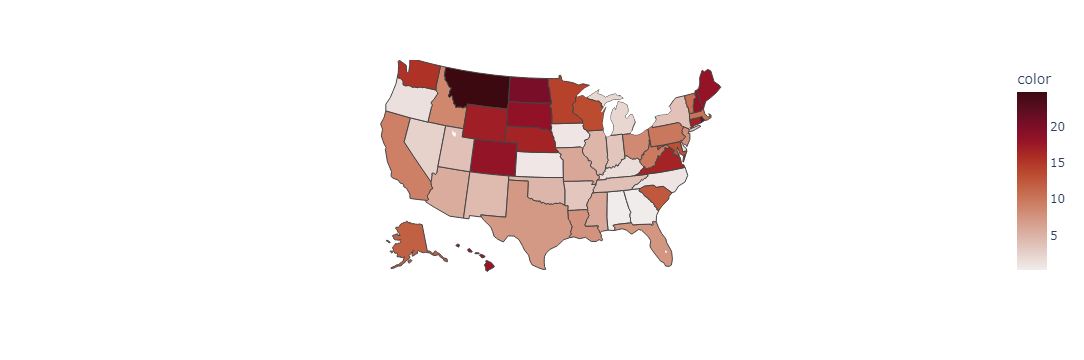

In [211]:
fig = px.choropleth(dfs,
                    locations='code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color=abs(rf.predict(rX)-aa),
                    color_continuous_scale="amp", 
                    )
fig.show()